In [1]:
import pandas as pd

In [2]:
# load "../data/wikipedia_pages2_w_embd/wiki_sci_embd.parquet" as df
df = pd.read_parquet("../data/wikipedia_pages2_w_embd/wiki_sci_embd.parquet")
df.head()

,text,url,title,embd
0,The Ulakhan Fault is a left-lateral moving tra...,https://en.wikipedia.org/wiki/Ulakhan%20Fault,Ulakhan Fault,"[-0.010125404, 0.045413326, -0.0055074026, 0.0..."
1,Tripodal ligands are tri- and tetradentate lig...,https://en.wikipedia.org/wiki/Tripodal%20ligand,Tripodal ligand,"[-0.008397752, -0.007900611, 0.028120818, 0.02..."
2,WASP-14b is an extrasolar planet discovered in...,https://en.wikipedia.org/wiki/WASP-14b,WASP-14b,"[0.021130525, 0.019535448, 0.028013904, -0.006..."
3,Long-acting reversible contraceptives (LARC) a...,https://en.wikipedia.org/wiki/Long-acting%20re...,Long-acting reversible contraception,"[-0.014279559, -0.005928753, -0.02585963, 0.01..."
4,"AIDS (""acquired immune deficiency syndrome"") i...",https://en.wikipedia.org/wiki/HIV%20integration,HIV integration,"[-0.02654824, -0.008117266, -0.0044153593, 0.0..."


In [3]:
# get df['text_length'] from df['text'] 
df['text_length'] = df['text'].str.len()

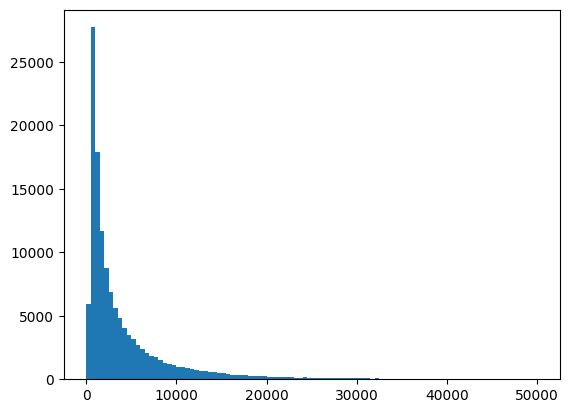

In [4]:
import matplotlib.pyplot as plt

plt.hist(df['text_length'], bins=100, range=(0, 5e4));

In [5]:
len(df)

131049

In [6]:
df.iloc[0]['embd'].shape

(1024,)

In [7]:
import numpy as np

ranges = np.logspace(0, 4, 20).astype(int)
ranges

array([    1,     1,     2,     4,     6,    11,    18,    29,    48,
          78,   127,   206,   335,   545,   885,  1438,  2335,  3792,
        6158, 10000])

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [1:04:26<00:00, 193.31s/it]


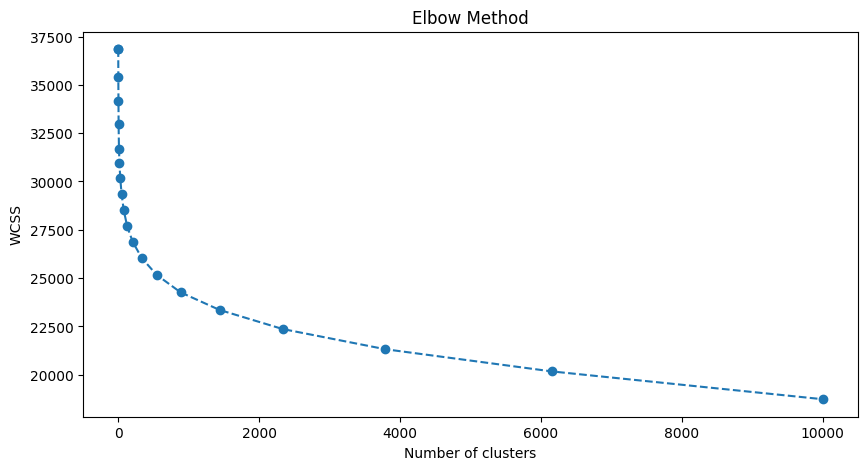

In [8]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from tqdm import tqdm

# Convert 'embd' column to a numpy matrix
X = np.stack(df['embd'].values)

# Using the elbow method to find the optimal number of clusters
wcss = []
for i in tqdm(ranges, total=len(ranges)):  # Checking for up to 10 clusters as an example
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init='auto', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
plt.plot(ranges, wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()